# F4B101A / TP4 / Analyse de séries temporelles et modèles ARMA

*D'après le notebook IPython par P. Tandeo et T. Guilment.*  
Données : concentration hebdomadaire de CO2 mesurée à Hawaii entre 1974 et 2016 (ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt).

In [2]:
using DataFrames
using DSP
using Gadfly
using PyCall
@pyimport numpy.linalg as linalg

In [3]:
Y = readdlm("CO2.txt")[:,1]; # CO2 concentration (ppm)
time = linspace(1974.38, 2016.753, length(Y)); # Year (decimal)

xmin = minimum(time);
xmax = maximum(time);

df_raw = DataFrame(x=time, y=Y, f="raw data");

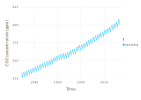

In [4]:
plot(df_raw, x=:x, y=:y, color=:f, Geom.line,
Coord.cartesian(xmin=xmin, xmax=xmax),
Guide.xlabel("Time"),
Guide.ylabel("CO2 concentration (ppm)"))

In [17]:
A = hcat(time.^2, time, ones(length(time)));
coeffs = linalg.lstsq(A, Y)[1];
T = coeffs[1]*(time.^2) + coeffs[2]*time + coeffs[3];

df_tendancy = DataFrame(x=time, y=T, f="tendancy");

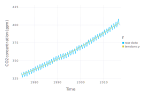

In [18]:
plot(vcat(df_raw, df_tendancy), x=:x, y=:y, color=:f, Geom.line,
Coord.cartesian(xmin=xmin, xmax=xmax),
Guide.xlabel("Time"),
Guide.ylabel("CO2 concentration (ppm)"))

In [7]:
p = periodogram(Y-T, fs=52);

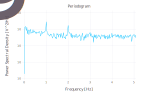

In [8]:
plot(x=p.freq, y=p.power, Geom.line,
Coord.cartesian(xmin=0, xmax=5),
Scale.y_log10,
Guide.xlabel("Frequency [Hz]"),
Guide.ylabel("Power Spectral Density [V^2/Hz]"),
Guide.title("Periodogram"))

$$S(t) = \beta_1 cos(2\pi\omega_1 t) + \beta_2 sin(2\pi\omega_1 t) + \beta_3 cos(2\pi\omega_2 t) + \beta_4 sin(2\pi\omega_2 t)$$

In [19]:
w1 = 1;
w2 = 2;

a1 = cos(2*pi*w1*time);
a2 = sin(2*pi*w1*time);
a3 = cos(2*pi*w2*time);
a4 = sin(2*pi*w2*time);

A = hcat(a1, a2, a3, a4);
coeffs = linalg.lstsq(A, Y-T)[1];
S = coeffs[1]*a1 + coeffs[2]*a2 + coeffs[3]*a3 + coeffs[4]*a4;

df_seasonality = DataFrame(x=time, y=Y+S, f="+ seasonality");

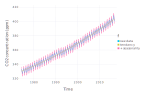

In [20]:
plot(vcat(df_raw, df_tendancy, df_seasonality), x=:x, y=:y, color=:f, Geom.line,
Coord.cartesian(xmin=xmin, xmax=xmax),
Guide.xlabel("Time"),
Guide.ylabel("CO2 concentration (ppm)"))

In [21]:
Z = Y-T-S;

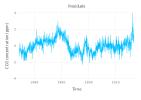

In [22]:
plot(x=time, y=Z, Geom.line,
Coord.cartesian(xmin=xmin, xmax=xmax),
Guide.xlabel("Time"),
Guide.ylabel("CO2 concentration (ppm)"),
Guide.title("Residuals"))

In [25]:
Z1 = Z[2:length(Z)];   # Z(t)
Z2 = Z[1:length(Z)-1]; # Z(t-1);

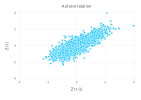

In [26]:
plot(x=Z2, y=Z1,
Guide.xlabel("Z(t-1)"),
Guide.ylabel("Z(t)"),
Guide.title("Autocorrelation"))

### 